# PCA and Multivariate Polynomial Regression

 Iris dataset is composed of 50 samples of flowers with 4 features. There are 3 flower types. First, we are going to reduce the dataset dimensionality to 2, so that we can visualize it. Before we use PCA, it is important to centralize the mean and standardize the data. This is important as feature imbalance can lead to PCA giving distorted priorities to some features.

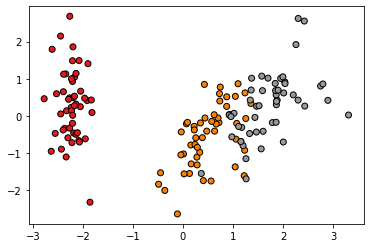

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# load from sklearn repository, but the dataset is also available at this notebook
# repository, if needed
iris = datasets.load_iris()
x = iris.data
y = iris.target

# rescale to get a centered mean and unit standard deviation
x_transf = StandardScaler().fit_transform(x)

# reduce dimensionality to 2 so that we can visualize in a 2D plot
pca = PCA(n_components=2)
xpca = pca.fit_transform(x_transf)

plt.figure()
plt.scatter(xpca[:, 0], xpca[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')


---

If we check the variance explained by the 2 components, we can see that the first component represents 73% percent of the original dataset variance. The second component explains another 23% of the original variance. Both of them together explain 96%, which is sufficient to represent well the original data.

Therefore, we can say that just by using these two components, we can apply a simpler multivariate regression and achieve practically the same results.

In [2]:
print("Explained variance: " + str(pca.explained_variance_))

print("Explained variance percentage: " + str(pca.explained_variance_ratio_))

Explained variance: [2.93808505 0.9201649 ]
Explained variance percentage: [0.72962445 0.22850762]



---

After fitting a linear regression model to the data, we can see that the model coefficients are near 0. This means that the model was not able to estimate the dependent variable with much confidence. The negative R2 score confirms that analysis, it tells us that the model performance was below average (R2 = 0). Note that, by average performance, we would have our model always predicting the dependent variable `y` to be `mean(y)`.

In [3]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# instantiate the linear regression model to work with the PCA reduced features
model = LinearRegression(fit_intercept=False)
model.fit(xpca, y)

# realiza a predicao com o modelo
y_pred = model.predict(xpca)

print("Model estimated coefficients: ") 
print(model.coef_)

# get R2 score fot the model. Best R2 is 1, average performance is 0, negative is below average performance
r2 = r2_score(y, y_pred)
print("\nR2 score for the model: "  + str(r2.round(2)))

Model estimated coefficients: 
[ 0.45149463 -0.01009609]

R2 score for the model: -0.61
